core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 77: Ignoring late data for a previously processed lap.The data may contain errors (previous: 17; current 18)
_api        WARNING 	Driver 10: Ignoring late data for a previously processed lap.The dat

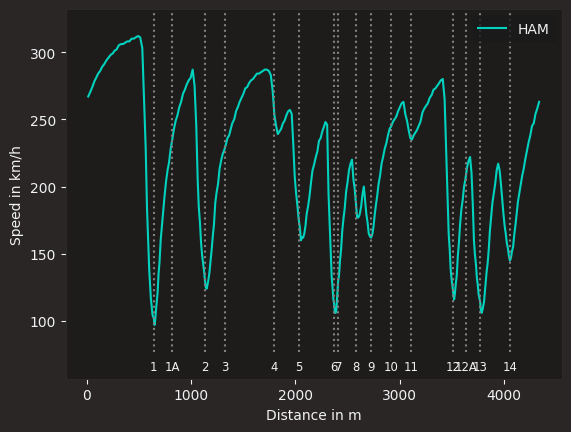

In [3]:
import matplotlib.pyplot as plt

import fastf1.plotting


# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# load a session and its telemetry data
session = fastf1.get_session(2021, 'Budapest', 'Q')
session.load()

fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

circuit_info = session.get_circuit_info()

team_color = fastf1.plotting.team_color(fastest_lap['Team'])

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color=team_color, label=fastest_lap['Driver'])

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.show()